In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
crop_data = pd.read_csv("D:\decohere AI\Main Project\crop-recommendation-main\data.csv")

In [30]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
X = crop_data.drop(columns=['label'])
y = crop_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9931818181818182


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9863636363636363


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9863636363636363


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features (optional but recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with K=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9681818181818181


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and loaded with your data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9613636363636363


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier


lr_classifier = LogisticRegression(max_iter=1000, random_state=42)


ensemble_classifier = VotingClassifier(estimators=[
    ('naive_bayes', nb_classifier),
    ('logistic_regression', lr_classifier)
], voting='hard')


ensemble_classifier.fit(X_train, y_train)


y_pred = ensemble_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Classifier Accuracy: {accuracy}')

Ensemble Classifier Accuracy: 0.9727272727272728


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
new_data = {
    'N': 100,
    'P': 50,
    'K': 160,
    'temperature': 52.7,
    'humidity':100.60,
    'ph':7.7,
    'rainfall':100.57
}

new_data_df = pd.DataFrame([new_data])

predicted_crop = ensemble_classifier.predict(new_data_df)
c=predicted_crop[0]

print("Predicted Crop:", c)

Predicted Crop: grapes


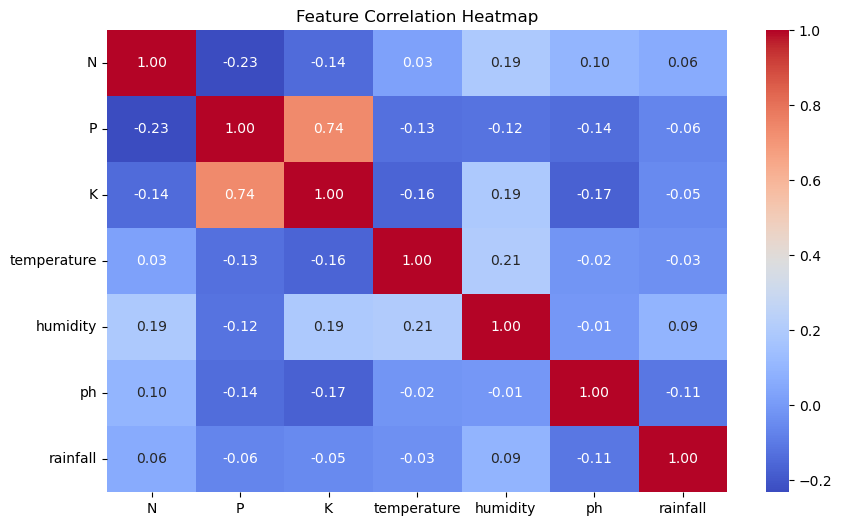

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.drop(columns=["label"])
df = pd.read_csv("D:/decohere AI/Main Project/crop-recommendation-main/data.csv")
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

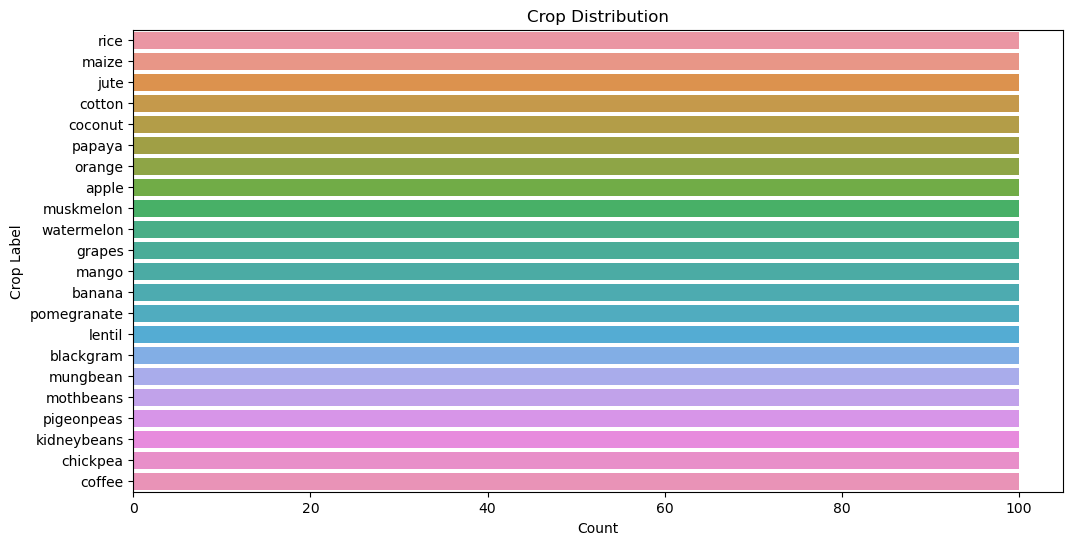

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title("Crop Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Label")
plt.show()

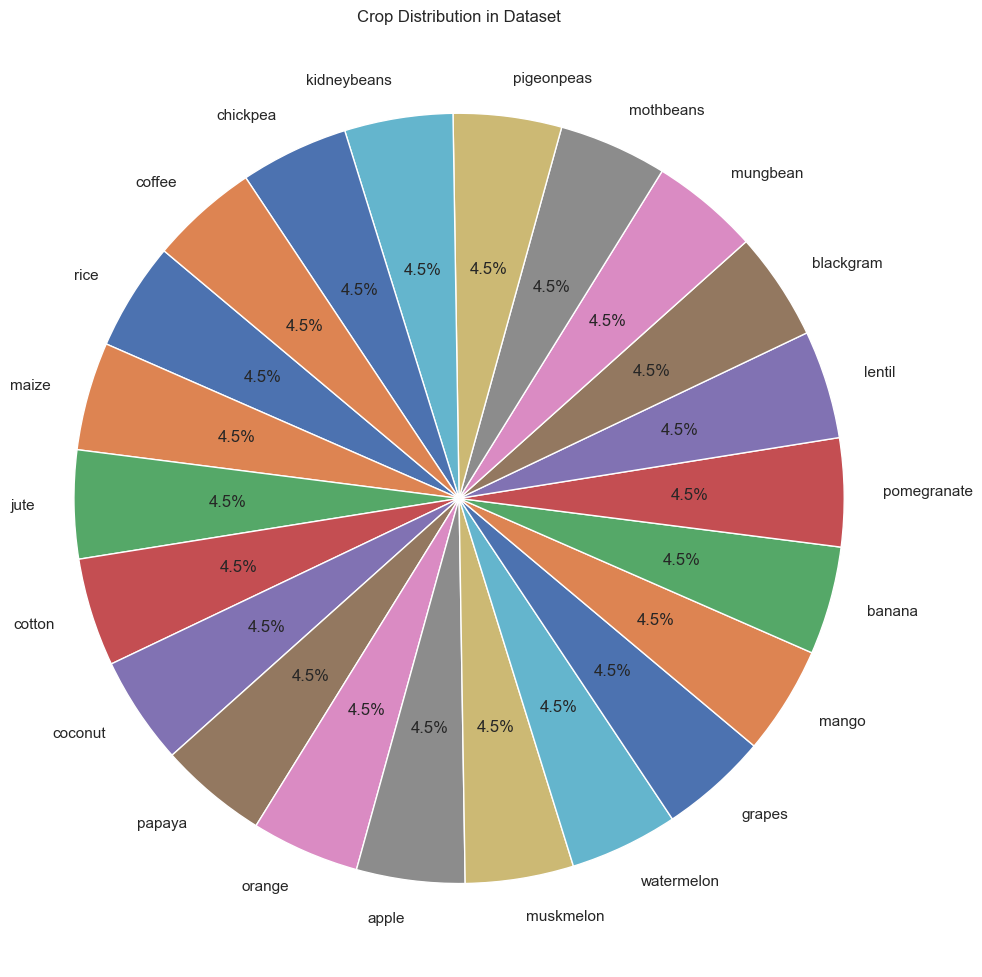

In [28]:
crop_counts = df['label'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(crop_counts.values, labels=crop_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Crop Distribution in Dataset")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()